This program uses a feed forward neural network, which is settled in machine learning.


In [25]:
# https://youtu.be/tepxdcepTbY
"""
@author: Sreenivas Bhattiprolu

Code tested on Tensorflow: 2.2.0
    Keras: 2.4.3

dataset: https://finance.yahoo.com/quote/GE/history/
Also try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
"""

'\n@author: Sreenivas Bhattiprolu\n\nCode tested on Tensorflow: 2.2.0\n    Keras: 2.4.3\n\ndataset: https://finance.yahoo.com/quote/GE/history/\nAlso try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC\n'

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

import yfinance as yf

# Data Preparation

In [27]:
dataframe = yf.download('^GSPC', start='2019-01-01', end='2022-12-31',interval='1d', progress=False)
dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


In [28]:
# Drops out volume from DataFrame
dataframe = dataframe.iloc[: ,:-1]
dataframe

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912
...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971


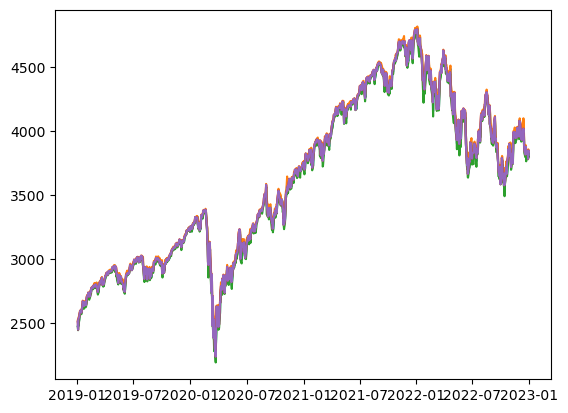

In [29]:
# Plot data
plt.plot(dataframe)

# Data Exploration

In [ ]:
dataframe['year'] = dataframe.index.year
dataframe['month'] = dataframe.index.month

In [ ]:
dataframe

In [ ]:
dataframe_new

In [30]:
data_dic = {'Date': dataframe.index, 'Close': dataframe['Close']}

In [31]:
dataframe_new_2 = pd.DataFrame(data_dic)

In [32]:
dataframe_new_2

,Date,Close
Date,,
2019-01-02,2019-01-02,2510.030029
2019-01-03,2019-01-03,2447.889893
2019-01-04,2019-01-04,2531.939941
2019-01-07,2019-01-07,2549.689941
2019-01-08,2019-01-08,2574.409912
...,...,...
2022-12-23,2022-12-23,3844.820068
2022-12-27,2022-12-27,3829.250000
2022-12-28,2022-12-28,3783.219971


In [37]:
dataframe_new_2['Date'] = pd.to_datetime(dataframe_new_2['Date'])

In [40]:
dataframe_new_2.set_index('Date', inplace=True)

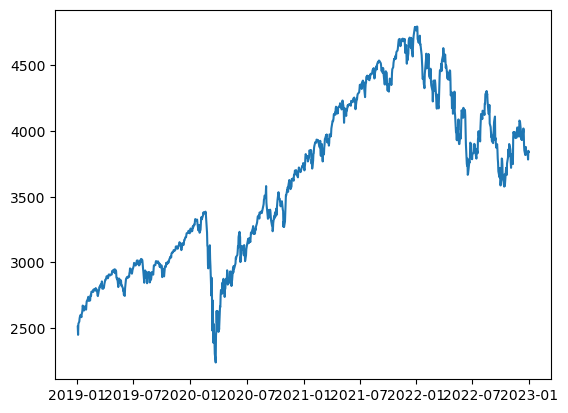

In [41]:
plt.plot(dataframe_new_2)

In [42]:
# Extracts year and month from date
dataframe_new_2['year'] = dataframe_new_2.index.year
dataframe_new_2['month'] = dataframe_new_2.index.month

In [43]:
dataframe_new_2

,Close,year,month
Date,,,
2019-01-02,2510.030029,2019,1
2019-01-03,2447.889893,2019,1
2019-01-04,2531.939941,2019,1
2019-01-07,2549.689941,2019,1
2019-01-08,2574.409912,2019,1
...,...,...,...
2022-12-23,3844.820068,2022,12
2022-12-27,3829.250000,2022,12
2022-12-28,3783.219971,2022,12


<Axes: xlabel='year', ylabel='Close'>

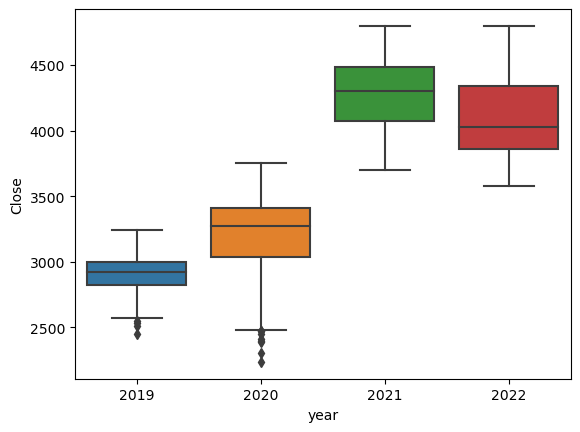

In [44]:
#Plot yearly and monthly values as boxplot
sns.boxplot(x='year', y='Close', data=dataframe_new_2)

<Axes: xlabel='month', ylabel='Close'>

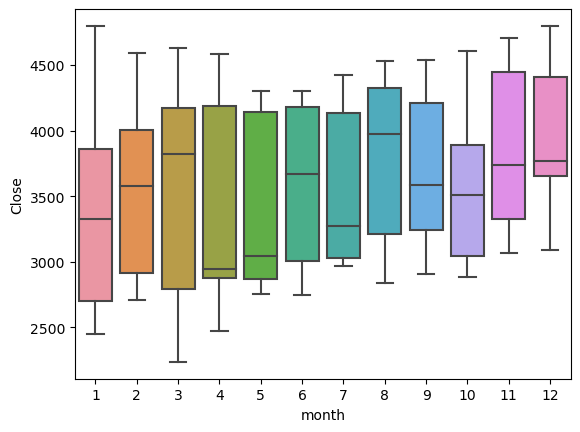

In [45]:
sns.boxplot(x='month', y='Close', data=dataframe_new_2)

In [ ]:
# Since time series data is commonly only correlated with nothing but itself,
# it is interesting to detect the degreee of autocorrelation for the dataset

""""
Autocorrelation is simply the correlation of a series with its own lags.
Plot lag on x axis and correlation on y axis
Any correlation above confidence lnes are statistically significant.

"""

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

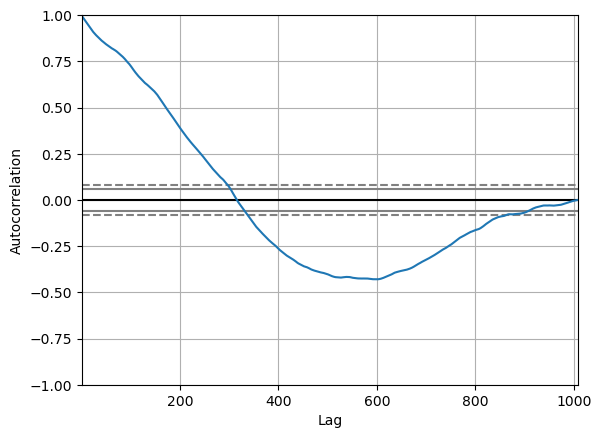

In [60]:
# Detect autocorrelation with pandas module
#Obtain the same but with single line and more info...
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataframe_new_2.Close) 
#Horizontal bands indicate 95% and 99% (dashed) confidence bands

In [ ]:
# In the graph one can see, that for smaller lags than 40 there is a 99% confidence of positive autocorrelation

# LSTM for multivariate Case

In [61]:
# Copies dataframe into new one for syntax purposes
df = dataframe.copy()

In [62]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912
...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971


In [101]:
train_dates = df.index
train_dates.shape

(1008,)

In [67]:
#Variables for training (Open, High, Low, Close)
cols = list(df)[0:4]
cols

['Open', 'High', 'Low', 'Close']

In [99]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)
df_for_training

,Open,High,Low,Close
0,2476.959961,2519.489990,2467.469971,2510.030029
1,2491.919922,2493.139893,2443.959961,2447.889893
2,2474.330078,2538.070068,2474.330078,2531.939941
3,2535.610107,2566.159912,2524.560059,2549.689941
4,2568.110107,2579.820068,2547.560059,2574.409912
...,...,...,...,...
1003,3815.110107,3845.800049,3797.010010,3844.820068
1004,3843.340088,3846.649902,3813.219971,3829.250000
1005,3829.560059,3848.320068,3780.780029,3783.219971
1006,3805.449951,3858.189941,3805.449951,3849.280029


In [100]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled

array([[-1.8083773 , -1.77008555, -1.79306259, -1.75843966],
       [-1.78480062, -1.81144472, -1.83029715, -1.85645041],
       [-1.81252196, -1.74092221, -1.78219773, -1.72388217],
       ...,
       [ 0.32330112,  0.3156492 ,  0.28692469,  0.24970366],
       [ 0.28530393,  0.33114098,  0.32599629,  0.35389712],
       [ 0.32251312,  0.30235472,  0.31790342,  0.33847153]])

In [73]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 4. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

In [74]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

In [76]:
df_for_training_scaled.shape

(1008, 4)

In [75]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [77]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (994, 14, 4).
trainY shape == (994, 1).


In [ ]:
#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

In [79]:
trainX.shape

(994, 14, 4)

In [78]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30113 (117.63 KB)
Trainable params: 30113 (117.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=50, validation_split=0.1, verbose=1)

Epoch 1/5
56/56 [==============================] - 1s 11ms/step - loss: 0.0330 - val_loss: 0.0115
Epoch 2/5
56/56 [==============================] - 1s 10ms/step - loss: 0.0346 - val_loss: 0.0100
Epoch 3/5
56/56 [==============================] - 1s 10ms/step - loss: 0.0293 - val_loss: 0.0113
Epoch 4/5
56/56 [==============================] - 1s 10ms/step - loss: 0.0308 - val_loss: 0.0112
Epoch 5/5
56/56 [==============================] - 1s 10ms/step - loss: 0.0323 - val_loss: 0.0089


In [89]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
56/56 [==============================] - 1s 12ms/step - loss: 0.0296 - val_loss: 0.0090
Epoch 2/5
56/56 [==============================] - 1s 11ms/step - loss: 0.0317 - val_loss: 0.0086
Epoch 3/5
56/56 [==============================] - 1s 10ms/step - loss: 0.0269 - val_loss: 0.0082
Epoch 4/5
56/56 [==============================] - 1s 10ms/step - loss: 0.0266 - val_loss: 0.0085
Epoch 5/5
56/56 [==============================] - 1s 10ms/step - loss: 0.0295 - val_loss: 0.0078


In [90]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=50  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)


[Timestamp('2022-12-08 00:00:00', freq='C'), Timestamp('2022-12-09 00:00:00', freq='C'), Timestamp('2022-12-12 00:00:00', freq='C'), Timestamp('2022-12-13 00:00:00', freq='C'), Timestamp('2022-12-14 00:00:00', freq='C'), Timestamp('2022-12-15 00:00:00', freq='C'), Timestamp('2022-12-16 00:00:00', freq='C'), Timestamp('2022-12-19 00:00:00', freq='C'), Timestamp('2022-12-20 00:00:00', freq='C'), Timestamp('2022-12-21 00:00:00', freq='C'), Timestamp('2022-12-22 00:00:00', freq='C'), Timestamp('2022-12-23 00:00:00', freq='C'), Timestamp('2022-12-27 00:00:00', freq='C'), Timestamp('2022-12-28 00:00:00', freq='C'), Timestamp('2022-12-29 00:00:00', freq='C'), Timestamp('2022-12-30 00:00:00', freq='C'), Timestamp('2023-01-03 00:00:00', freq='C'), Timestamp('2023-01-04 00:00:00', freq='C'), Timestamp('2023-01-05 00:00:00', freq='C'), Timestamp('2023-01-06 00:00:00', freq='C'), Timestamp('2023-01-09 00:00:00', freq='C'), Timestamp('2023-01-10 00:00:00', freq='C'), Timestamp('2023-01-11 00:00:00'

In [91]:

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

2/2 [==============================] - 0s 5ms/step


In [92]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [93]:
df = df.reset_index()


C:\Users\PC\AppData\Local\Temp\ipykernel_10028\2239289300.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


<Axes: xlabel='Date', ylabel='Open'>

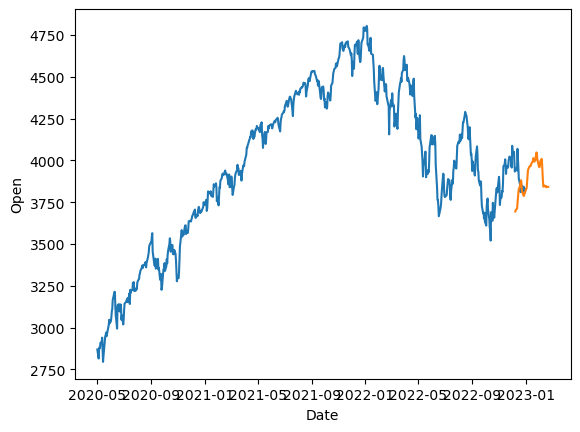

In [94]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(x=original['Date'], y=original['Open'])
sns.lineplot(x=df_forecast['Date'], y=df_forecast['Open'])